<a href="https://colab.research.google.com/github/doha-22f22901/Amazon-Sales-MapReduce/blob/main/AIDLAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/cat-rabbit binary classification/train'
test_dir = '/content/drive/MyDrive/cat-rabbit binary classification/test'

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/cat-rabbit binary classification/train/cat')))
print(len(os.listdir('/content/drive/MyDrive/cat-rabbit binary classification/train/rabbit')))
print(len(os.listdir('/content/drive/MyDrive/cat-rabbit binary classification/test/cat')))
print(len(os.listdir('/content/drive/MyDrive/cat-rabbit binary classification/test/rabbit')))

500
500
50
50


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Validation data
validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
# create CNN model
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(256,256,3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 150s 6s/step - accuracy: 0.5397 - loss: 1.0082 - val_accuracy: 0.7000 - val_loss: 0.5824
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.7006 - loss: 0.5690 - val_accuracy: 0.7950 - val_loss: 0.4961
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.7665 - loss: 0.4622 - val_accuracy: 0.8050 - val_loss: 0.4485
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.8236 - loss: 0.3813 - val_accuracy: 0.7950 - val_loss: 0.5311
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.8687 - loss: 0.2905 - val_accuracy: 0.8150 - val_loss: 0.4317
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.9310 - loss: 0.1985 - val_accuracy: 0.8450 - val_loss: 0.4336
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.9571 - loss: 0.0876 - val_accuracy: 0.7700 - val_loss: 0.6812
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step - accuracy: 0.9795 - loss: 0.0571 - val_accuracy: 0.9000 - v

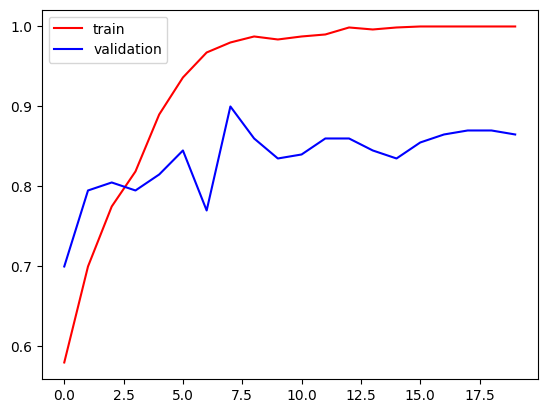

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

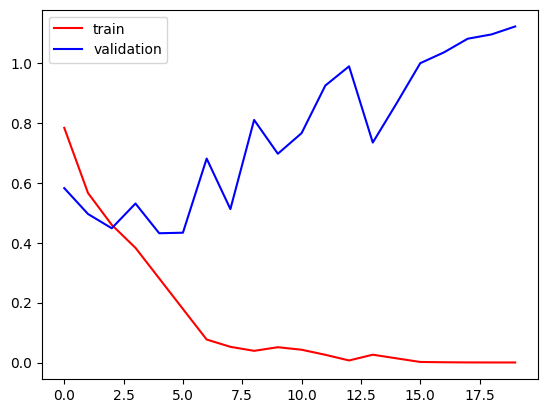

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[23 27]
 [25 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.46      0.47        50
           1       0.48      0.50      0.49        50

    accuracy                           0.48       100
   macro avg       0.48      0.48      0.48       100
weighted avg       0.48      0.48      0.48       100



In [24]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [25]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit (
    train_data,
    epochs=20,
    validation_data=validation_data
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.7028 - loss: 3.6544 - val_accuracy: 0.6850 - val_loss: 1.2747
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.7796 - loss: 2.4557 - val_accuracy: 0.5700 - val_loss: 3.0694
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.8070 - loss: 2.2699 - val_accuracy: 0.6450 - val_loss: 1.1617
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7659 - loss: 1.5753 - val_accuracy: 0.6400 - val_loss: 1.0752
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.8615 - loss: 0.9221 - val_accuracy: 0.5050 - val_loss: 2.6551
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.8786 - loss: 0.6780 - val_accuracy: 0.6150 - val_loss: 1.1443
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.8925 - loss: 0.6479 - val_accuracy: 0.5900 - val_loss: 2.3082
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 198s 8s/step - accuracy: 0.8735 - loss: 0.9332 - val_accuracy: 0.5100 - v

In [28]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [29]:
predictions = model.predict(test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[23 27]
 [39 11]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.37      0.46      0.41        50
           1       0.29      0.22      0.25        50

    accuracy                           0.34       100
   macro avg       0.33      0.34      0.33       100
weighted avg       0.33      0.34      0.33       100



In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 248s 10s/step - accuracy: 0.5282 - loss: 3.2673 - val_accuracy: 0.5000 - val_loss: 0.7352
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 235s 9s/step - accuracy: 0.5433 - loss: 0.7981 - val_accuracy: 0.7050 - val_loss: 0.6010
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 232s 9s/step - accuracy: 0.6488 - loss: 0.6543 - val_accuracy: 0.5050 - val_loss: 1.2418
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 265s 11s/step - accuracy: 0.5723 - loss: 0.8249 - val_accuracy: 0.7200 - val_loss: 0.5730
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 229s 9s/step - accuracy: 0.7420 - loss: 0.5261 - val_accuracy: 0.5550 - val_loss: 0.7453
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 231s 9s/step - accuracy: 0.6721 - loss: 0.6061 - val_accuracy: 0.6900 - val_loss: 0.5586
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.6826 - loss: 0.5660 - val_accuracy: 0.6100 - val_loss: 0.7312
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 228s 9s/step - accuracy: 0.7226 - loss: 0.5272 - val_accuracy: 0.6850 -

In [34]:
predictions = resnet_model.predict(test_data)

3/4 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[28 22]
 [32 18]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        50
           1       0.45      0.36      0.40        50

    accuracy                           0.46       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.46      0.45       100

